# Coordinates

EEGlab has a file with the coordinates of all usual electrodes. This file has the following name `Standard-10-5-Cap385.sfp`. You can ignore the extension, it is a simple `.csv` file. We will change the extension of this file for the following procedures. 

In [1]:
import os
import pandas as pd
import re
import numpy as np
import string as str

/tmp/ipykernel_6170/1484773307.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
cwd = os.getcwd()
flist = os.listdir()
for f in flist:
    if bool(re.search('.csv',f)) and not bool(re.search('sample',f)) :
        break

eeg_coord_df = pd.read_csv(os.path.join(cwd,f), delimiter='\t', index_col=0, header=None)

Let us take a look at the names of the electrodes in the file

In [3]:
eeg_coord_df.index

Index(['LPA', 'RPA', 'Nz', 'Fp1', 'Fpz', 'Fp2', 'AF9', 'AF7', 'AF5', 'AF3',
       ...
       'OIz', 'OI2', 'T3', 'T5', 'T4', 'T6', 'M1', 'M2', 'A1', 'A2'],
      dtype='object', name=0, length=348)

Now we will open the file with the electrodes we wish to find the coordinates. In this example, we will EEG recordings from the brazilian company called EMSA.

In [4]:
for f in flist:
    if bool(re.search('.csv',f)) and bool(re.search('sample',f)) :
        break

eeg_samp_df = pd.read_csv(os.path.join(cwd,f))

In [5]:
eeg_samp_df

,F7,T3,T5,Fp1,F3,C3,P3,O1,F8,T4,...,C4,P4,O2,Fz,Cz,Pz,Oz,A1,A2,FOTO1
0,-11,-47,-17,98,-103,-128,-10,44,6,-58,...,-2,90,83,6,0,128,-10,-97,-28,0
1,0,-47,-12,98,-107,-134,-15,50,-2,-83,...,-10,86,63,-10,0,128,-2,-87,-19,0
2,11,-45,-4,96,-109,-138,-19,56,-14,-99,...,-14,86,42,-24,-2,126,6,-78,-11,0
3,19,-41,6,92,-111,-140,-21,62,-25,-105,...,-14,88,26,-39,-2,126,15,-70,-6,0
4,25,-37,17,86,-113,-138,-17,71,-39,-105,...,-12,92,16,-53,-2,126,21,-63,-2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745195,-190,-99,-90,-151,-115,-98,-38,56,-187,-31,...,24,-40,97,-35,0,-8,-115,-59,-118,0
745196,-173,-68,-65,-149,-105,-86,-29,87,-239,-54,...,26,-32,111,-41,0,4,-113,-55,-113,0
745197,-156,-45,-38,-147,-96,-73,-15,119,-280,-85,...,26,-24,125,-45,0,17,-111,-55,-111,0
745198,-137,-25,-12,-140,-86,-59,-2,150,-286,-113,...,24,-20,135,-47,0,27,-115,-59,-115,0


Now, we are going to map the electrodes in our EEG recordings to EEGlab file.

In [6]:
chan_map = np.zeros(eeg_samp_df.columns.shape[0], dtype=int)
l1 = 0
for dchan in eeg_samp_df.columns:
    l2 = 0
    for ichan in eeg_coord_df.index:
        if dchan.lower() == ichan.lower():
            chan_map[l1] = l2
        l2+=1
    l1+=1

Checking if we mapped correctly.

In [7]:
l1 = 0
for dchan in eeg_samp_df.columns:
    print(dchan, eeg_coord_df.index[chan_map[l1]])
    l1 +=1

F7 F7
T3 T3
T5 T5
Fp1 Fp1
F3 F3
C3 C3
P3 P3
O1 O1
F8 F8
T4 T4
T6 T6
Fp2 Fp2
F4 F4
C4 C4
P4 P4
O2 O2
Fz Fz
Cz Cz
Pz Pz
Oz Oz
A1 A1
A2 A2
FOTO1 LPA


Since we are not interested in all electrodes. For example, we do not need A1, A2, FOTO1. Therefore, we drop them.

In [8]:
valid_ch = eeg_samp_df.columns[0:eeg_samp_df.columns.shape[0]-3]

In [9]:
vchan_coord = np.zeros((valid_ch.shape[0],3))

l1 = 0
for ch in valid_ch:
    vchan_coord[l1][0] =  eeg_coord_df.iloc[chan_map[l1],0]
    vchan_coord[l1][1] =  eeg_coord_df.iloc[chan_map[l1],1]
    vchan_coord[l1][2] =  eeg_coord_df.iloc[chan_map[l1],2]
    l1 +=1

Checking.

In [10]:
k = 2
print(valid_ch[k], vchan_coord[k][0:3])
print(eeg_coord_df.index[chan_map[k]], eeg_coord_df.iloc[chan_map[k],0], eeg_coord_df.iloc[chan_map[k],1],
     eeg_coord_df.iloc[chan_map[k],2])

T5 [-0.0804 -0.0586 -0.0088]
T5 -0.0804 -0.0586 -0.0088


Creating the dataframe that contains all information we need.

In [11]:
coordinates_df = pd.DataFrame(vchan_coord[:,:], index=valid_ch, columns=['x', 'y', 'z'])  
coordinates_df

,x,y,z
F7,-0.0804,0.0586,-0.0088
T3,-0.0994,0.0000,-0.0104
T5,-0.0804,-0.0586,-0.0088
Fp1,-0.0307,0.0949,-0.0047
F3,-0.0567,0.0677,0.0469
C3,-0.0742,0.0000,0.0668
P3,-0.0567,-0.0677,0.0469
O1,-0.0307,-0.0949,-0.0047
F8,0.0804,0.0587,-0.0088
T4,0.0994,0.0000,-0.0104


In [12]:
coordinates_df.to_csv('coordinates.csv')

# Triggers

In this particular file, the triggers were configured as train of pulses. A train of 2 pulses, for example, indicates one trigger. On the other hand, 3 pulses indicates a different trigger.

In [13]:
triggers = eeg_samp_df['FOTO1'].to_numpy()

Just to take a look at the signal, we are going to plot it.

In [14]:
!pip install matplotlib

In [15]:
from matplotlib import pyplot as plt

We are going to use the sillence between two train of pulses to identify the appearance of a trigger.

In [18]:
sil_int = 50
pulse_vec = np.zeros(triggers.shape[0])
for i in range(sil_int+1, triggers.shape[0]):
    if sum(triggers[i-sil_int-1:i-1]) == 0:
        if (triggers[i] < 0) and (triggers[i-1] == 0): # new pulse detected
            pulse_vec[i]= 1 

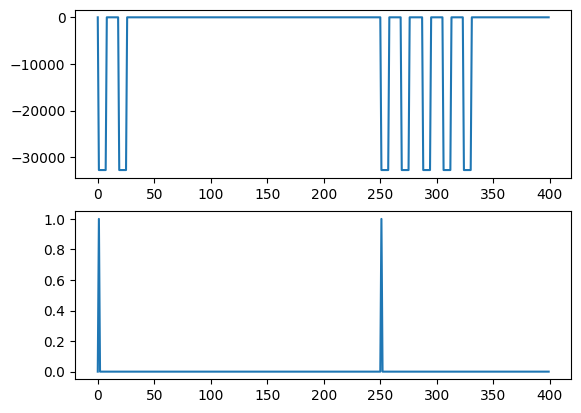

In [19]:
k = 4
b = 5000 + k * 400
e = b + 400
fig, axs = plt.subplots(2)
axs[0].plot(triggers[b:e])
axs[1].plot(pulse_vec[b:e])

Now, we are going to differentiate the triggers based on the fact that the trigger with more pulses present 5 pulses in an interval inferior 100 samples.

In [20]:
for l1 in range(pulse_vec.shape[0]):
    if pulse_vec[l1] == 1: # new pulse
        ptype = 0
        for l2 in range(l1,l1+100):
            if triggers[l2] < triggers[l2-1]:
                ptype +=1
        pulse_vec[l1] = ptype


Now, we can check if we were able to differentiate them correctly.

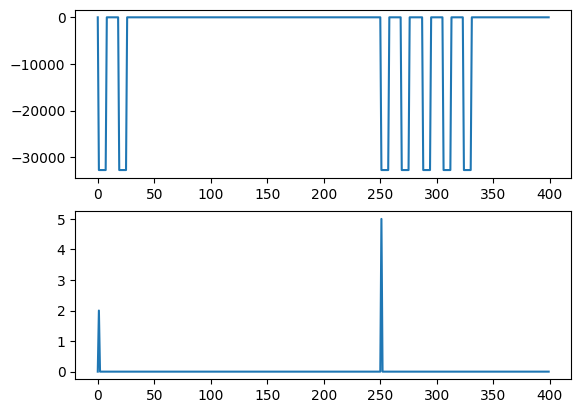

In [219]:
k = 4
b = 5000 + k * 400
e = b + 400
fig, axs = plt.subplots(2)
axs[0].plot(triggers[b:e])
axs[1].plot(pulse_vec[b:e])

In [221]:
eeg_samp_df['FOTO1'] = pulse_vec

In [223]:
eeg_samp_df.to_csv('output_file.csv')